<center> <h1> <b> Estimation Theory Mini project-1 </b>  </h1> </center>
<center> <h1> <b> Group-10 </b>  </h1> </center>
<h2> <b>Problem 1 <h2> </b>
<h4>
Here we are given the linear representation for an OFDM-like system  modelled with a complex gaussian noise with variance &sigma;<sup>2</sup>.
 The first task is to estimate h and find the error between the estimated and the true value of h using the Euclidean Norm.
<p>
<center> <b> Y = XFh + n </b> </center>
<center> <b> h = (A<sup>H</sup>A)<sup>-1</sup>A<sup>H</sup> Y , where A = XF
</p</h4>

In [1]:
import numpy as np
import random

# Parameters
L = 32
lam = 0.2
n_stddev = np.sqrt(0.01)/2

# Generate F Matrix
F = np.zeros((512, L), dtype = 'complex')

for i in range(F.shape[0]):
    for j in range(F.shape[1]):
        F[i][j] = np.round(np.exp(complex(0, 2*np.pi*(i)*(j)/512)))

# Generate X Matrix
X = np.zeros((512,512), dtype = 'complex')
QPSK = [complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)]
for i in range(X.shape[0]):
    X[i][i] = np.random.choice(QPSK, p = [0.25, 0.25, 0.25, 0.25])

# Generate p and h
p = np.zeros((L, 1))
for k in range(p.shape[0]):
    p[k][0] = np.exp(-lam*(k))
p = p.astype('complex')
    
a = np.random.normal(loc = 0, scale = 0.5, size = (L,1))
a = a.astype('complex')
b = np.random.normal(loc = 0, scale = 0.5, size = (L,1))
b = b*1j

h = (1/np.linalg.norm(p))*(a+b)*p

# Generating noise n
n = np.random.normal(loc=0, scale=n_stddev, size=(512,2)).view(np.complex128)


In [2]:
# Generating y, y = XFh + n; y = Ah + n; where A = XF
X = np.matrix(X)
F = np.matrix(F)
h = np.matrix(h)
n = np.matrix(n)
A = np.matmul(X,F)
y = np.matmul(A,h) + n

# Estimating h
A = np.matrix(A)
h_LS = np.matmul(np.matmul(np.linalg.inv(np.matmul(A.H, A)), A.H), y)

print("The estimated value of h is \n \n",h)
print("\n Error without sparse h =", np.linalg.norm(h-h_LS))

The estimated value of h is 
 
 [[ 1.21361361e-02+1.27862602e-01j]
 [-1.24360635e-02+2.77398743e-01j]
 [ 5.54520849e-03+1.74425494e-02j]
 [ 2.57197263e-01-8.35647642e-02j]
 [-2.11292240e-01+7.72235276e-02j]
 [ 2.71408528e-01-2.09241431e-01j]
 [-8.24414736e-02+2.69952315e-02j]
 [-6.32097935e-02-1.01542826e-01j]
 [-7.18531049e-02-4.26925029e-03j]
 [ 3.27880803e-02+1.54176349e-02j]
 [-4.35159342e-02-1.17855519e-02j]
 [-1.60918103e-02+4.08377080e-02j]
 [ 1.07799252e-02+1.33127874e-02j]
 [-3.97840055e-02-3.13447609e-03j]
 [ 1.88580680e-04+1.57019841e-02j]
 [-1.40759720e-02-1.57845185e-02j]
 [ 8.98431278e-03+1.30061426e-02j]
 [-1.38404894e-03-4.27337583e-03j]
 [-1.89942818e-03+2.18578544e-02j]
 [ 5.42381651e-03+1.17131008e-02j]
 [ 3.09706228e-04+1.79411272e-03j]
 [ 2.84097789e-03-3.46586886e-03j]
 [-3.65380423e-03+7.90067746e-03j]
 [ 1.31551291e-04-2.50590466e-03j]
 [ 1.91722466e-04-2.79244684e-03j]
 [-4.84388436e-04-1.86743712e-03j]
 [-5.27157902e-05-7.54791325e-04j]
 [ 5.92165272e-05+1.868

<h2><b> Problem-2</b></h2>
<h4>
Now we introduce a variation by making the h sparse with only 6 non-zero taps. Since the choice of choosing the non-zero locations is left to us, we have set the first 6 locations as non-zero and computed the required h and the error between the true and estimated value. </h4>

In [3]:

# Generating y, y = XFh + n; y = Ah + n; where A = XF

X = np.matrix(X)
F = np.matrix(F)
h = np.matrix(h)
n = np.matrix(n)
F_m = F[:,:6]
h_m = h[:6]
A_m = np.matmul(X,F_m)
y_m = np.matmul(A_m,h_m) + n

# Estimating h
A_m = np.matrix(A_m)
h_LS_m = np.matmul(np.matmul(np.linalg.inv(\
         np.matmul(A_m.H, A_m)), A_m.H), y_m)

print("The estimated value of sparse h is \n \n",h_m)
print("\n Error with sparse h =", np.linalg.norm(h_m-h_LS_m))

The estimated value of sparse h is 
 
 [[ 0.01213614+0.1278626j ]
 [-0.01243606+0.27739874j]
 [ 0.00554521+0.01744255j]
 [ 0.25719726-0.08356476j]
 [-0.21129224+0.07722353j]
 [ 0.27140853-0.20924143j]]

 Error with sparse h = 0.005194392297445025


<h2> <b> Problem-3 Part a </b> </h2>
<h4>
Here the problem is divided into 2 parts. First we introduce the concept of guard bands. As per the problem statement, we supress the first and last 180 symbols in X to 0 and compute the same results as in Problems 1 and 2. </h4>

In [4]:
#Generate X matrix with guard bands
Xg = np.zeros((512,512), dtype = 'complex')
for i in range(180,X.shape[0]-178):
    Xg[i][i] = np.random.choice(QPSK, p = [0.25, 0.25, 0.25, 0.25])
Xg = np.matrix(Xg)

# Generating y, y = XFh + n; y = Ah + n; where A = XF
Ag = np.matmul(Xg,F)
Ag_m = np.matmul(Xg,F_m)
yg = np.matmul(Ag,h) + n
yg_m = np.matmul(Ag_m,h_m) + n

# Estimating h
Ag = np.matrix(Ag)
Ag_m = np.matrix(Ag_m)
hg_LS = np.matmul(np.matmul(np.linalg.inv(np.matmul(Ag.H, Ag)), Ag.H), yg)
hg_LS_m = np.matmul(np.matmul(np.linalg.inv(np.matmul\
                (Ag_m.H, Ag_m)), Ag_m.H), yg_m)

print("The estimated value of h with guard bands is \n \n",hg_LS)
print("\n The estimated value of sparse h with guard bands is \n \n",hg_LS_m)
print("\n Error with guard bands =", np.linalg.norm(h-hg_LS))
print("\n Error with guard bands, sparse h =",np.linalg.norm(h_m-hg_LS_m))

The estimated value of h with guard bands is 
 
 [[ 1.56850479e-02+0.13395078j]
 [-5.32580412e-03+0.29402788j]
 [ 9.36524318e-03+0.02152954j]
 [ 2.58316139e-01-0.09571652j]
 [-2.05114876e-01+0.08708976j]
 [ 2.73723350e-01-0.18540757j]
 [-9.52564799e-02+0.02799101j]
 [-8.19367355e-02-0.10783857j]
 [-7.71146584e-02+0.00070274j]
 [ 2.53982542e-02+0.02035233j]
 [-4.92512415e-02-0.01029068j]
 [-5.90946050e-03+0.03710814j]
 [ 2.77494809e-02+0.00733857j]
 [-3.76330257e-02+0.00403321j]
 [ 2.83477631e-03+0.01985921j]
 [-1.02973532e-02-0.02808506j]
 [ 9.30728182e-03+0.02225401j]
 [ 1.99100246e-03+0.01020008j]
 [ 8.44317777e-03+0.01471985j]
 [-4.57116177e-05+0.01430454j]
 [-8.40727801e-03+0.02413727j]
 [ 9.38289052e-03-0.00289427j]
 [ 1.50402729e-03-0.00042397j]
 [-1.66712128e-03-0.00139727j]
 [ 4.55681640e-03-0.00219745j]
 [ 8.32266919e-03+0.008889j  ]
 [-4.48299084e-04+0.00938525j]
 [ 7.63231384e-03-0.00497606j]
 [ 9.29626825e-03-0.0104877j ]
 [ 2.95799237e-03+0.00503377j]
 [ 7.27379942e-05+0.0

<h2><b> Problem 3 Part b</h2></b>
<h4>
Now, we introduce the concept of regularization to control the influence of noise on the estimated value of h. The regularization hyperparameter is &alpha;. As a result of this, the estimated h value now becomes

<center> <b> h = (X<sup>H</sup> X + &alpha;.I<sub><i>nxn</i></sub>)<sup>-1</sup> X <sup>H</sup> Y</center></b>
</p</h4>

We then compute this value for varying values of alpha and locate the minimum point with the least error.

  PLOTS FOR REGULARIZATION WITHOUT GUARD BANDS 
 



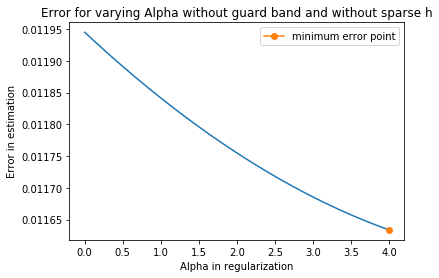

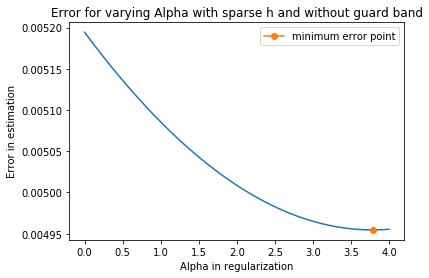

In [5]:
#Q3 PART - 2
alpha = 0
I = np.identity(32,dtype=complex)
I1 = np.identity(6,dtype=complex)

errors = []
errorsg = []
errors_m = []
errorsg_m = []
alphas = []

for i in range(0,4000,5):
    alpha = i/1000
    alphas.append(alpha)
    reg_term = alpha*I
    reg_term_m = alpha*I1
    h_LS = np.matmul((np.matmul((np.linalg.inv\
         (np.matmul(A.H,A)+reg_term)),A.H)),y)
    hg_LS = np.matmul((np.matmul((np.linalg.inv\
         (np.matmul(Ag.H,Ag)+reg_term)),Ag.H)),yg)
    h_LS_m = np.matmul((np.matmul((np.linalg.inv\
         (np.matmul(A_m.H,A_m)+reg_term_m)),A_m.H)),y_m)
    hg_LS_m = np.matmul((np.matmul((np.linalg.inv\
         (np.matmul(Ag_m.H,Ag_m)+reg_term_m)),Ag_m.H)),yg_m)
    errors_m.append(np.linalg.norm(h_m-h_LS_m))
    errorsg_m.append(np.linalg.norm(h_m-hg_LS_m))
    errors.append(np.linalg.norm(h-h_LS))
    errorsg.append(np.linalg.norm(h-hg_LS))


import matplotlib.pyplot as plt
arg_min = np.argmin(errors)
arg_min1 = np.argmin(errorsg)
arg_min2 = np.argmin(errors_m)
arg_min3 = np.argmin(errorsg_m)

min_error = errors[arg_min]
min_alpha = alphas[arg_min]
min_error_m = errors_m[arg_min2]
min_alpha_m = alphas[arg_min2]

min_errorg = errorsg[arg_min1]
min_alphag= alphas[arg_min1]
min_errorg_m = errorsg_m[arg_min3]
min_alphag_m = alphas[arg_min3]

print('\033[1m  PLOTS FOR REGULARIZATION WITHOUT GUARD BANDS \n \n')
plt.plot(alphas,errors)
plt.plot(min_alpha,min_error,marker='o',label='minimum error point')
plt.title('Error for varying Alpha without guard band and without sparse h')
plt.xlabel('Alpha in regularization')
plt.ylabel('Error in estimation')
plt.legend()
plt.show()


plt.plot(alphas,errors_m)
plt.plot(min_alpha_m,min_error_m,marker='o',label='minimum error point')
plt.title('Error for varying Alpha with sparse h and without guard band')
plt.xlabel('Alpha in regularization')
plt.ylabel('Error in estimation')
plt.legend()
plt.show()



  PLOTS FOR REGULARIZATION WITH GUARD BANDS 
 



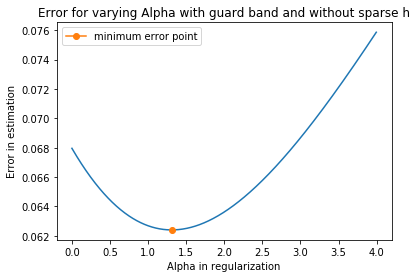

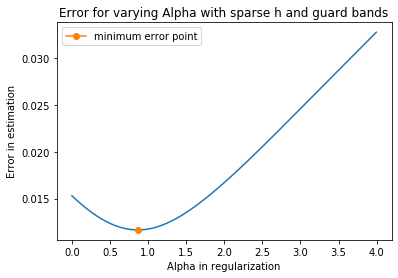

In [6]:

print('\033[1m  PLOTS FOR REGULARIZATION WITH GUARD BANDS \n \n')

plt.plot(alphas,errorsg)
plt.plot(min_alphag,min_errorg,marker='o',label='minimum error point')
plt.title('Error for varying Alpha with guard band and without sparse h')
plt.xlabel('Alpha in regularization')
plt.ylabel('Error in estimation')
plt.legend()
plt.show()


plt.plot(alphas,errorsg_m)
plt.plot(min_alphag_m,min_errorg_m,marker='o',label='minimum error point')
plt.title('Error for varying Alpha with sparse h and guard bands')
plt.xlabel('Alpha in regularization')
plt.ylabel('Error in estimation')
plt.legend()
plt.show()


<h3> <b>Summary of observations and conclusions for Questions 1,2 and 3 </b></h3>
<h4>
1. The error between the true and the estimated value of h changes as we introduce the guard bands in X. This is because the guard band which is originally used to supress the frequencies outside a particular band, can be thought of as reducing information in the context of this problem.
<h4>
2. On introducing a sparse h, we can see that estimated value is closer to the true value for both with and without guard bands. 
<h4>
3. When we introduce regularization, we can see that the error value decreases for almost all cases of estimation. It appears to have a minima and then increases upon further increase in the hyperparameter. This is because, initially when we increase the hyperparameter, the influence of the noise on the estimated h reduces. But once we cross the minima, we also start supressing the information present in A and hence error increases.
<h4>
4. When the model is run for different values of X and noise, we see that the minimum error point also changes. In some cases, it is also possible that there exists no valur of &alpha; for which error is minimized.

<h2><b> Question 4: Least squares with constraints </h2></b>

## Code:

In [7]:
%reset -f

In [8]:
import numpy as np
import matplotlib.pyplot as plt

### Generate h

$h[k] = (a[k]+ib[k])\frac{p[k]}{||p||}, p[k] = e^{-\lambda (k-1)}, a[k], b[k] \sim N(0,0.5)$

But given constraints:

$h[1] = h[2]$

$h[3] = h[4]$

$h[5] = h[6]$

In [9]:
#Generate h without constraints
L = 32
lambda_p = 0.2

a = np.sqrt(0.5)*np.random.randn(L)
b = np.sqrt(0.5)*np.random.randn(L)
p = np.exp(-lambda_p*np.arange(0,L,1))
p = p/np.linalg.norm(p)

h = p*(a+1.j*b)

del a,b,p

#Add constraints to h
h[1] = h[0].copy()
h[3] = h[2].copy()
h[5] = h[4].copy()

### Generate F

In [10]:
N = 512
I, J = np.meshgrid(np.arange(L),np.arange(N))
F = np.exp(1.j*2*np.pi*I*J/512)
del I,J

### Generate X

X is QPSK, with each symbol being equiprobable.

Since we have vectorised our code to run for all ensembles in parallel, X is generated accordingly(all at once as a 2d numpy array)

In [11]:
N_iter = 10000

rand_array = np.random.rand(N_iter,N)
ones_array = np.ones((N_iter,N))

X = (-1-1.j)*(np.less(rand_array,0.25*ones_array))+\
(-1+1.j)*(np.less(rand_array,0.5*ones_array)&np.greater(rand_array,0.25*ones_array))+\
(1-1.j)*(np.less(rand_array,0.75*ones_array)&np.greater(rand_array,0.5*ones_array))+\
(1+1.j)*(np.greater(rand_array,0.75*ones_array))

del rand_array, ones_array

### Add noise

Since the noise is complex, its PSD is divided equally into 2 quadratures. Also, we are asked to do it for two distinct variances

In [12]:
sigma1 = np.sqrt(0.1)
sigma2 = np.sqrt(0.01)

n1 = np.sqrt(0.5)*(sigma1*np.random.randn(N_iter,N)+1.j*sigma1*np.random.randn(N_iter,N))
n2 = np.sqrt(0.5)*(sigma2*np.random.randn(N_iter,N)+1.j*sigma2*np.random.randn(N_iter,N))

In [13]:
F_mult_h = F@h

y1 = X*F_mult_h+n1
y2 = X*F_mult_h+n2

### Unconstrained estimate

For the constrained estimate we first need the estimate without any constraints.

$\hat{\theta} = (H^H H)^{-1} H^H y$

Here $H = XF$

One analytical observation we have used is that since $X$ is QPSK, $X^H X = 2I$, regardless of which symbol is transmitted. This simplifies things computationally since we no longer need to calculate $H^H H$ for the 10000 ensembles. Matrix inversion is memory intensive as well as time taking. This memory saving was used in vectorising the code to enable parallel processing of the 10000 ensembles on ordinary computer.

In [14]:
H_h_H = 2*(np.conj(F.T)@F)
H_h_H_inv = np.linalg.inv(H_h_H)

theta_hat_1 = ((H_h_H_inv@np.conj(F.T))@(np.conj(X)*y1).T).T
theta_hat_2 = ((H_h_H_inv@np.conj(F.T))@(np.conj(X)*y2).T).T

### Constraint matrices

The constrainied solution $\hat{\theta_c}$ satisfies:

$A \hat{\theta_c} = b$.

We define A and b matrices for the contraints mentioned above

In [15]:
n_constraints = 3
A = np.zeros((n_constraints,L))
b = np.zeros(n_constraints)
A[0,0] = 1
A[0,1] = -1
A[1,2] = 1
A[1,3] = -1
A[2,4] = 1
A[2,5] = -1

### Finding Lagrange Multipliers

Now we proceed to use the formulae for Lagrange multipliers for optimal solution.

$\frac{\lambda}{2} = (A(H^H H)^{-1}A^T)^{-1}(A\hat{\theta}-b) $

In [16]:
#Note: The extra tranposes are for shape broadcasting according to convention used in this code.
lambda_1 = (2*(np.linalg.inv(A@H_h_H_inv@(A.T))@((A@theta_hat_1.T).T-b).T)).T
lambda_2 = (2*(np.linalg.inv(A@H_h_H_inv@(A.T))@((A@theta_hat_2.T).T-b).T)).T

### Substituting to find optimal solution under constraints

$\hat{\theta_c} = \hat{\theta}-(H^H H)^{-1}A^T \frac{\lambda}{2}$

In [17]:
theta_c_1 = theta_hat_1-((H_h_H_inv)@A.T@(0.5*lambda_1.T)).T
theta_c_2 = theta_hat_2-((H_h_H_inv)@A.T@(0.5*lambda_2.T)).T

### Comparing true parameter and mean of estimated parameter

We take mean of estimated parameter over 10000 ensembles for the two noise variances and compare with the true parameter. We plot as well as print each of the above. 

True h
[ 8.64821807e-02-3.71287139e-01j  8.64821807e-02-3.71287139e-01j
  1.19560461e-01+1.24399968e-02j  1.19560461e-01+1.24399968e-02j
  4.34664693e-01-1.59314158e-01j  4.34664693e-01-1.59314158e-01j
  1.37115721e-01-2.58174658e-02j  4.93728650e-02-7.56329519e-02j
  1.09146581e-02+5.60244772e-03j  6.53220765e-02-2.41635728e-03j
 -3.96937253e-03+7.33233391e-02j  6.92976300e-02+3.28452777e-02j
 -5.13140834e-02+2.48075948e-03j  4.25318384e-02+2.63669663e-02j
 -1.78298312e-02+7.73125313e-04j -2.06202360e-02-5.10213448e-02j
  3.27350420e-03-2.02815986e-03j  3.29289265e-02-5.38999778e-03j
 -1.14884536e-03-8.12164032e-03j -8.46135182e-03-1.03640547e-02j
 -4.22007124e-03+2.12453681e-02j -7.14498820e-03-6.69430247e-04j
 -4.94803025e-03-1.94836109e-03j  1.96297720e-03+1.17960402e-03j
 -1.44705181e-03-4.62249089e-03j -3.84256599e-03+1.75667200e-03j
  2.92771859e-03-2.01335564e-03j  5.50804207e-04+1.46709361e-04j
 -1.07576596e-03+4.01490832e-04j  4.70280168e-04-7.51518254e-04j
 -9.54611063e-05+3

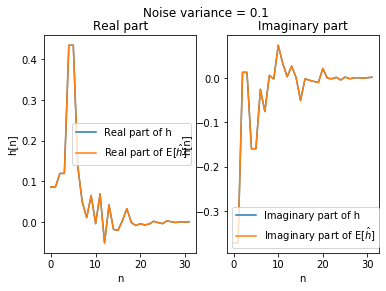

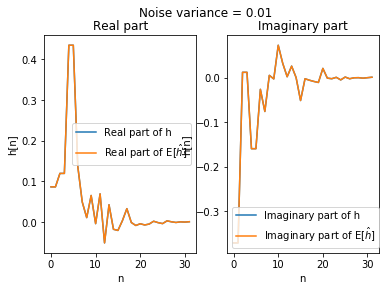

In [18]:
mean_theta_c_1 = np.mean(theta_c_1,axis=0)
mean_theta_c_2 = np.mean(theta_c_2,axis=0)

print('=====================')
print('True h')
print(h)
print('\n')
print('Estimated h under variance = 0.1')
print(mean_theta_c_1)
print('\n')
print('\n')

print('=====================')
print('True h')
print(h)
print('\n')
print('Estimated h under variance = 0.01')
print(mean_theta_c_2)
print('\n')
print('\n')

print('Fractional error in h for variance = 0.1')
print(np.sum(np.abs(h-mean_theta_c_1))/np.sum(np.abs(h)))
print('\n')
print('Fractional error in h for variance = 0.01')
print(np.sum(np.abs(h-mean_theta_c_2))/np.sum(np.abs(h)))

#Plots
fig, ax = plt.subplots(1,2)
ax[0].plot(np.real(h),label='Real part of h')
ax[0].plot(np.real(mean_theta_c_1),label='Real part of E['+r'$\hat{h}$'+']')
ax[0].set_xlabel('n')
ax[0].set_ylabel('h[n]')
ax[0].legend()
ax[0].set_title('Real part')

ax[1].plot(np.imag(h),label='Imaginary part of h')
ax[1].plot(np.imag(mean_theta_c_1),label='Imaginary part of E['+r'$\hat{h}$'+']')
ax[1].set_xlabel('n')
ax[1].set_ylabel('h[n]')
ax[1].legend()
ax[1].set_title('Imaginary part')
plt.suptitle('Noise variance = 0.1')
plt.show()

fig, ax = plt.subplots(1,2)
ax[0].plot(np.real(h),label='Real part of h')
ax[0].plot(np.real(mean_theta_c_2),label='Real part of E['+r'$\hat{h}$'+']')
ax[0].set_xlabel('n')
ax[0].set_ylabel('h[n]')
ax[0].legend()
ax[0].set_title('Real part')

ax[1].plot(np.imag(h),label='Imaginary part of h')
ax[1].plot(np.imag(mean_theta_c_2),label='Imaginary part of E['+r'$\hat{h}$'+']')
ax[1].set_xlabel('n')
ax[1].set_ylabel('h[n]')
ax[1].legend()
ax[1].set_title('Imaginary part')
plt.suptitle('Noise variance = 0.01')
plt.show()

### Theoretical and simulated MSE

Theoretical MSE for constrained solution is given by

$J_c = E[||y-H\hat{\theta_c}||^2]$

$J_c = E[||P_\perp y||^2], y = H\theta_0+n$

This simplifies to 
$J_c = Tr(E[nn^H]E[P_\perp])$

$J_c = \sigma^2 Tr(P_\perp) = \sigma^2(N-L)$

Simulated MSE:

Mean of norm squared of difference between true and predicted observations over 10000 ensembles

In [19]:
th_mse_1 = (sigma1**2)*(N-L)
th_mse_2 = (sigma2**2)*(N-L)

y1_pred = X*(F@mean_theta_c_1)
y2_pred = X*(F@mean_theta_c_2)

sim_mse_1 = np.mean(np.sum(np.abs(y1-y1_pred)**2,axis=1))
sim_mse_2 = np.mean(np.sum(np.abs(y2-y2_pred)**2,axis=1))

In [20]:
print('=================')
print('Noise variance = 0.1')
print('Theoretical MSE')
print(th_mse_1)
print('Simulated MSE')
print(sim_mse_1)

print('=================')
print('Noise variance = 0.01')
print('Theoretical MSE')
print(th_mse_2)
print('Simulated MSE')
print(sim_mse_2)

Noise variance = 0.1
Theoretical MSE
48.0
Simulated MSE
51.21017073422766
Noise variance = 0.01
Theoretical MSE
4.800000000000001
Simulated MSE
5.119373684046654


### Plots of true parameter and estimated parameter for 1 instance

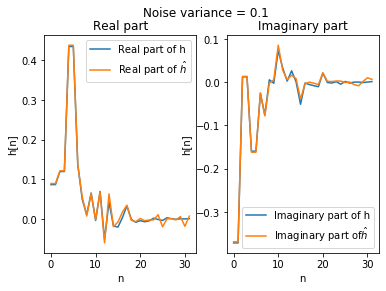

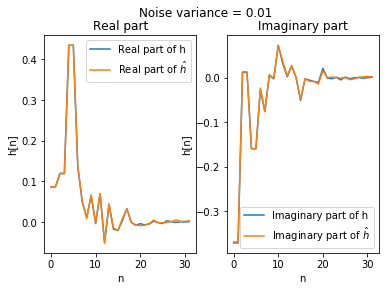

In [21]:
#Plots
fig, ax = plt.subplots(1,2)
ax[0].plot(np.real(h),label='Real part of h')
ax[0].plot(np.real(theta_c_1[0]),label='Real part of '+r'$\hat{h}$')
ax[0].set_xlabel('n')
ax[0].set_ylabel('h[n]')
ax[0].legend()
ax[0].set_title('Real part')

ax[1].plot(np.imag(h),label='Imaginary part of h')
ax[1].plot(np.imag(theta_c_1[0]),label='Imaginary part of'+r'$\hat{h}$')
ax[1].set_xlabel('n')
ax[1].set_ylabel('h[n]')
ax[1].legend()
ax[1].set_title('Imaginary part')
plt.suptitle('Noise variance = 0.1')
plt.show()

fig, ax = plt.subplots(1,2)
ax[0].plot(np.real(h),label='Real part of h')
ax[0].plot(np.real(theta_c_2[0]),label='Real part of '+r'$\hat{h}$')
ax[0].set_xlabel('n')
ax[0].set_ylabel('h[n]')
ax[0].legend()
ax[0].set_title('Real part')

ax[1].plot(np.imag(h),label='Imaginary part of h')
ax[1].plot(np.imag(theta_c_2[0]),label='Imaginary part of '+r'$\hat{h}$')
ax[1].set_xlabel('n')
ax[1].set_ylabel('h[n]')
ax[1].legend()
ax[1].set_title('Imaginary part')
plt.suptitle('Noise variance = 0.01')
plt.show()

### Delete variables to clear memory

In [22]:
del L, lambda_p, N_iter
del F, F_mult_h, h, y1, y2
del X, n1, n2, sigma1, sigma2
del theta_c_1, theta_c_2, H_h_H, H_h_H_inv
del lambda_1, lambda_2, A, b
del mean_theta_c_1, mean_theta_c_2
del th_mse_1, sim_mse_1, th_mse_2, sim_mse_2

## Summary of observations and conclusions for Question 4

1. We plotted as well as printed the true and mean estimated parameters for the two given noise variances. They agree almost exactly. The percentage error in mean of estimated parameter against the true parameter was 0.071% and 0.0223% for $\sigma^2 = 0.1,0.01$ respectively.
2. Then we calculated the theoretical MSE as well as simulated MSE for the given set of 10000 ensembles for both noise variances. Theoretical and Simulated expressions agree alomst perfectly. Also as expected, the simulated(as well as theoretical) MSE for lesser noise variance is lesser, being approximately proportional to noise variance, with MSE for $\sigma^2=0.01$ 0.1 times of that for $\sigma^2=0.1$.
3. Finally we plotted the estimates against true parameters for just one of the ensembles. There is good agreement, however the agreement in plots is lesser compared to sample mean of estimated parameter(because averaging improves estimates).
4. Hence we explored various aspects of constrained least squares estimation for an ensemble size of 10000 and 2 distinct noise variances. 

# Question 5

In [23]:
# Parameters
L = 32
lam = 0.2
n_stddev = np.sqrt(0.01)/2

# Generate F Matrix
F = np.zeros((512, L), dtype = 'complex')

for i in range(F.shape[0]):
    for j in range(F.shape[1]):
        F[i][j] = np.round(np.exp(complex(0, 2*np.pi*(i)*(j)/512)))

# Generate X Matrix
X = np.zeros((512,512), dtype = 'complex')
QPSK = [complex(1,1), complex(-1,1), complex(1,-1), complex(-1,-1)]
for i in range(X.shape[0]):
    X[i][i] = np.random.choice(QPSK, p = [0.25, 0.25, 0.25, 0.25])

# Generate p and h
p = np.zeros((L, 1))
for k in range(p.shape[0]):
    p[k][0] = np.exp(-lam*(k))
p = p.astype('complex')
    
a = np.random.normal(loc = 0, scale = 0.5, size = (L,1))
a = a.astype('complex')
b = np.random.normal(loc = 0, scale = 0.5, size = (L,1))
b = b*1j

h = (1/np.linalg.norm(p))*(a+b)*p

# Generating noise n
n = np.random.normal(loc=0, scale=n_stddev, size=(512,2)).view(np.complex128)


In [24]:
# Generating y, y = XFh + n; y = Ah + n; where A = XF
X = np.matrix(X)
F = np.matrix(F)
h = np.matrix(h)
n = np.matrix(n)
A = np.matmul(X,F)
y = np.matmul(A,h) + n

# Generating the matrices for the sparse case
F_z = F[:,:6]
h_z = h[:6]
A_z = np.matmul(X,F_z)
y_z = np.matmul(A_z,h_z) + n
A_z = np.matrix(A_z)

# Generating the matrices in the case of guard band
X_g = X.copy()
X_g[:180, :] = 0
X_g[512-180:,:] = 0
A_g = np.matmul(X_g,F)
y_g = np.matmul(A_g,h) + n

# Creating lists of matrices for each case
X = [X, X_g]
F = [F_z, F]
h = [h_z, h]
A = [A_z, A_g]
y = [y_z,y_g]

In [25]:
# Looping through the cases and implementing the algorithm for each case

for i in [0,1]:
    # parameters
    k0 = 6
    S = []
    k = 1
    r = y[i]

    for k in range(1,k0+1):
        t = np.argmax(np.matmul(A[i].H,r))
        if t not in S:
            S.append(t)
        A_s = A[i][:,S]
        inverse = np.matmul(np.linalg.inv(np.matmul(A_s.H, A_s)), A_s.H)
        P = np.matmul(A_s, inverse)
        I = np.identity(512)
        r = np.matmul((I - P), y[i])
        k+= 1

    #print(S)

    F_m = F[i][:,S]
    h_m = h[i][S]
    A_m = np.matmul(X[i],F_m)
    y_m = np.matmul(A_m,h_m) + n

    # Estimating h
    A_m = np.matrix(A_m)
    if i==0:
        h_LS_m = np.matmul(np.matmul(np.linalg.inv(np.matmul(A_m.H, A_m)), A_m.H), y_m)
        print('Case 1: Sparse h\n')
        print("The estimated value of h is \n \n",h_m)
        print("\n Error =", np.linalg.norm(h_m-h_LS_m))
        print('\n')
    else:
        print('Case 2: Guard Band\n')
        h_LS_m = np.matmul(np.matmul(np.linalg.inv(np.matmul(A_m.H, A_m)), A_m.H), y_m)
        print("The estimated value of h is \n \n",h_m)
        print("\n Error =", np.linalg.norm(h_m-h_LS_m))
        print('\n')

        print('Case 3: Guard Band with regularisation\n')
        I = np.identity(F_m.shape[1],dtype = 'complex')
        alpha = 1
        reg_term_m = alpha*I
        h_LS_m_reg = np.matmul(np.matmul(np.linalg.inv(np.matmul(A_m.H,A_m)+reg_term_m),A_m.H),y_m)
        print("The estimated value of h is \n \n",h_m)
        print("\n Error =", np.linalg.norm(h_m-h_LS_m_reg))
        print('\n')

Case 1: Sparse h

The estimated value of h is 
 
 [[0.18858934-0.26051701j]
 [0.07001115-0.03486669j]
 [0.04405897-0.31544997j]]

 Error = 0.002146497795906353


Case 2: Guard Band

The estimated value of h is 
 
 [[ 0.04405897-0.31544997j]
 [ 0.18858934-0.26051701j]
 [ 0.03151381-0.03090524j]
 [-0.00696051+0.00090306j]
 [ 0.00051188+0.01361812j]
 [ 0.12131329+0.11170244j]]

 Error = 0.010977636670391642


Case 3: Guard Band with regularisation

The estimated value of h is 
 
 [[ 0.04405897-0.31544997j]
 [ 0.18858934-0.26051701j]
 [ 0.03151381-0.03090524j]
 [-0.00696051+0.00090306j]
 [ 0.00051188+0.01361812j]
 [ 0.12131329+0.11170244j]]

 Error = 0.01071120106877475




We note that the MSE is lower using this algorithm in all 3 cases